# Trabajo Práctico N°2

## Pablo Toledo Margalef
* Transformaciones puntuales
   * Transformaciones lógicas, aritméticas y geométricas
   
Todos los ejercicios están en el [siguiente repositorio](https://github.com/PaPablo/pdi-mdp)

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

Imageio: 'coins.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coins.png (77 kB)
Downloading: 8192/78467 bytes (10.449152/78467 bytes (62.6%78467/78467 bytes (100.0%)
  Done
File saved as /home/jovyan/.imageio/images/coins.png.
Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.949152/139512 bytes (35.2139512/139512 bytes (100.0%)
  Done
File saved as /home/jovyan/.imageio/images/camera.png.


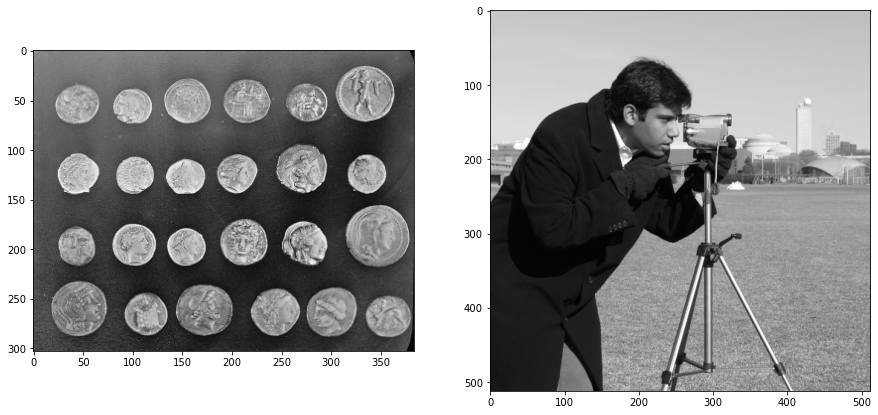

In [2]:
coins = imageio.imread('imageio:coins.png')
camera = imageio.imread('imageio:camera.png')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].imshow(coins,cmap='gray')
ax[1].imshow(camera,cmap='gray')

plt.show()

## Ejercicio 1

Programe las siguientes transformaciones aritméticas.
1. Suma de dos imágenes. Asuma que las imágenes pueden no tener el mismo tamaño.
1. Resta de dos imágenes. Asuma que las imágenes pueden no tener el mismo tamaño.
1. División y/o multiplicación de una imagen por un escalar.
1. Promediar N imágenes. Asuma que las imágenes son enviadas como parámetros a la función.

In [3]:
def bin_im_op(im_a, im_b, operation):
    im_a_h,im_a_w = im_a.shape
    im_b_h,im_b_w = im_b.shape

    im_out_h = max(im_a_h, im_b_h)
    im_out_w = max(im_a_w, im_b_w)

    im_out = np.zeros((im_out_h, im_out_w))

    for i, row in enumerate(im_a):
        for j, _ in enumerate(row):
            im_out[i][j] = im_a[i][j]
    
    for i, row in enumerate(im_b):
        for j, _ in enumerate(row):
            im_out[i][j] = operation(im_out[i][j],im_b[i][j])
            
    return np.clip(im_out, 0, 255)

In [4]:
def im_add(im_a, im_b):
    return bin_im_op(im_a, im_b, lambda x,y: x+y)

In [5]:
add_out = im_add(coins, camera)

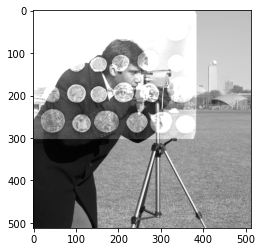

In [6]:
plt.imshow(add_out, cmap='gray')

In [7]:
def im_sub(im_a, im_b):         
    return bin_im_op(im_a, im_b, lambda x,y :x - y)

In [8]:
sub_out = im_sub(camera, coins)

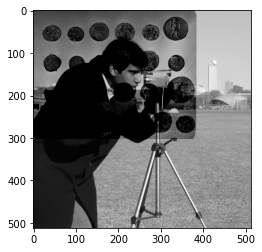

In [9]:
plt.imshow(sub_out, cmap='gray')

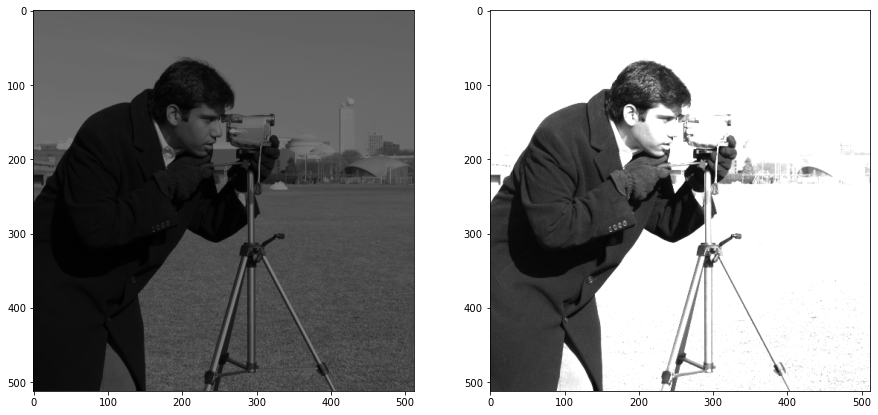

In [10]:
def scalar_op(im, scalar):
    int_im = im.astype(np.uint64)
    return np.clip(int_im*scalar, 0, 255).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(scalar_op(camera, .5), vmin=0, vmax=255, cmap='gray')
ax[1].imshow(scalar_op(camera, 2), vmin=0, vmax=255, cmap='gray')
plt.show()

In [11]:
def im_avg(imgs):
    accum = np.zeros((10, 10))
    
    for i in imgs:
        accum = im_add(accum, i)
        
    return accum/len(imgs)

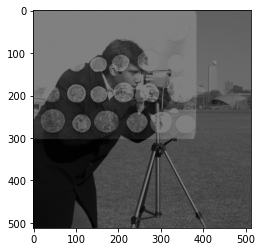

In [12]:
plt.imshow(im_avg([camera, coins]), cmap='gray', vmin=0, vmax=255)

## Ejercicio 2
Programe las siguientes transformaciones lógicas. Para estos casos, asuma que las imágenes se encuentran umbraladas y define que toma usted como 1 lógico y que como 0 lógico.
   1. Intersección de dos imágenes binarias (AND).
   2. Unión de dos imágenes binarias (OR).

In [29]:
# Función de umbralamiento
def threshold(im, thresh=.5):
    s = im.copy()/255
    s[s > thresh] = 1
    s[s<= thresh] =0
    return s

def bit_im_op(im_a, im_b,op):
    return bin_im_op(im_a, im_b, op)

def im_and(im_a, im_b, zero=0, one=1):
    return bit_im_op(im_a, im_b, lambda x,y: (x==one) and (y==one))

def im_or(im_a, im_b, zero=0, one=1):
    return bit_im_op(im_a, im_b,lambda x,y: (x==one) or (y==one))


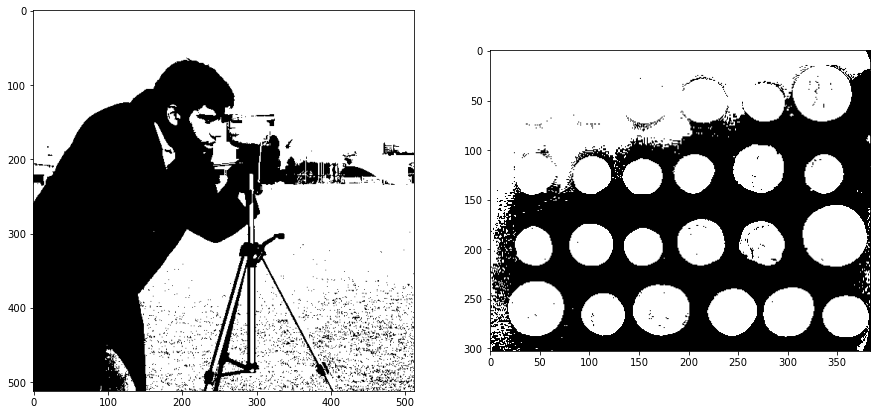

In [30]:
bin_camera = threshold(camera, .5)
bin_coins = threshold(coins, .3)
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(bin_camera, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(bin_coins, cmap='gray', vmin=0, vmax=1)

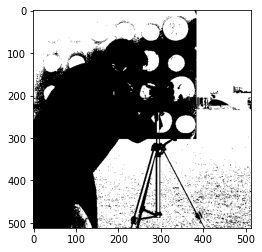

In [31]:
plt.imshow(im_and(bin_camera, bin_coins), cmap='gray', vmin=0, vmax=1)

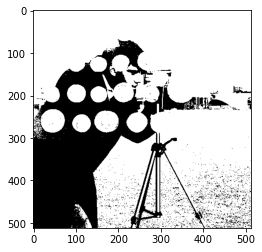

In [32]:
plt.imshow(im_or(bin_camera, bin_coins), cmap='gray', vmin=0, vmax=1)

## Ejercicio 3

Programe las siguientes transformaciones geométricas simples

1. Reflexión Horizontal
1. Reflexión Vertical
1. Reflexión Doble
1. Rotación Fija en 90°
1. Rotación Fija en 180°

In [42]:
def horizontal_reflection(im):
    h,w = im.shape
    im_out = np.zeros((h,w))
    
    for i, row in enumerate(im):
        for j, p in enumerate(row):
            im_out[i][j] = im[i][w-j-1]
    
    return im_out

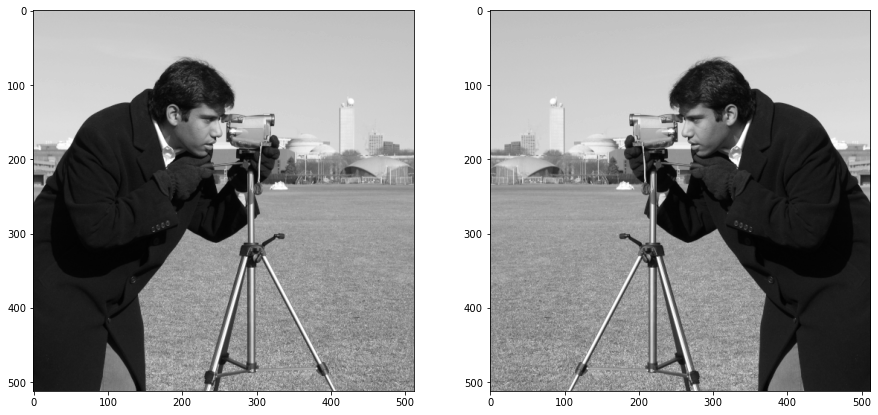

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(horizontal_reflection(camera), cmap='gray')

In [44]:
def vertical_reflection(im):
    h,w = im.shape
    im_out = np.zeros((h,w))
    
    for i, row in enumerate(im):
        for j, p in enumerate(row):
            im_out[i][j] = im[h-i-1][j]
    
    return im_out

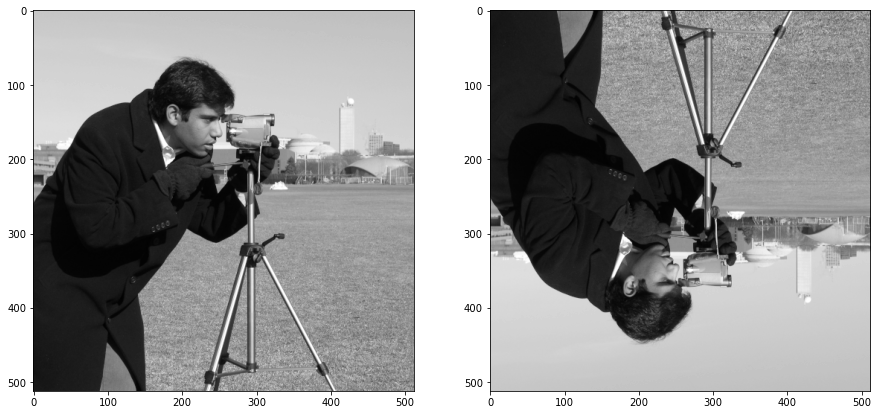

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(vertical_reflection(camera), cmap='gray')

In [48]:
def double_reflection(im):
    return vertical_reflection(horizontal_reflection(im))

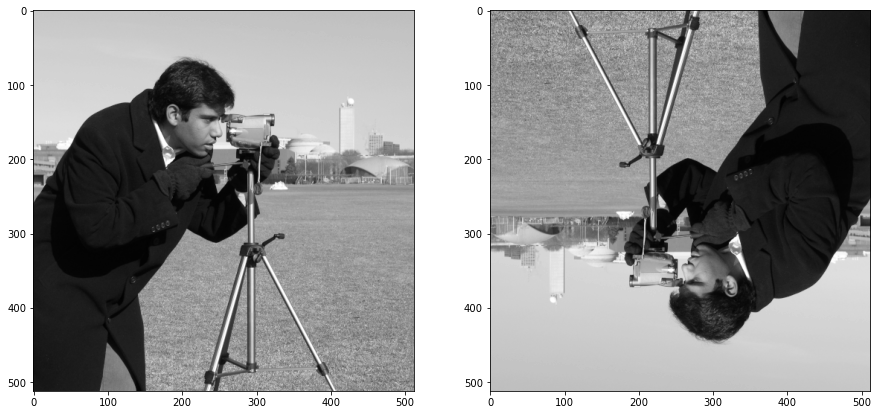

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(double_reflection(camera), cmap='gray')

In [52]:
def rotation_90(im):
    h,w = im.shape
    im_out = np.zeros((w,h))
    
    for i, row in enumerate(im):
        for j, p in enumerate(row):
            im_out[j][h-i-1] = im[i][j]
    
    return im_out

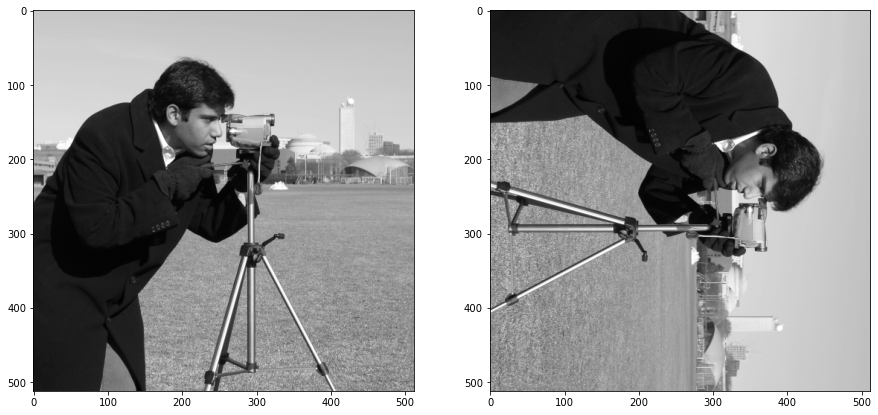

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(rotation_90(camera), cmap='gray')

In [54]:
def rotation_180(im):
    h,w = im.shape
    im_out = np.zeros((h,w))
    
    for i, row in enumerate(im):
        for j, p in enumerate(row):
            im_out[h-1-i][w-1-j] = im[i][j]
    
    return im_out

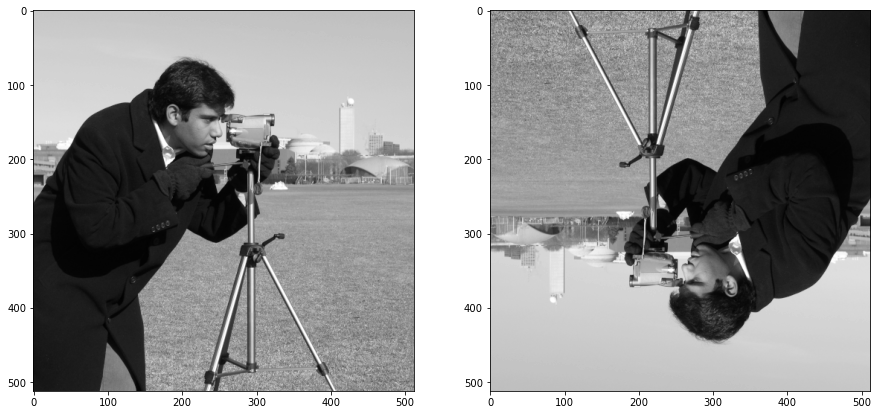

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(camera, cmap='gray')
ax[1].imshow(rotation_180(camera), cmap='gray')

## Ejercicio 4

Programe las transformaciones geométricas de escalamiento, traslación y rotación libre utilizando el enfoque de “fuente a destino”.

In [57]:
def scalign(im):
    pass